analyze NCI cervical cnv results

example cnv file: 
/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-03-06-02242/hg19a/GSH/A57097_A56625/cnv/tc_50/25662/results/apolcnv_out_segs_annotated.txt

it looks like in the annotation file, cnv state column
0= Ncnv, Acnv, Dcnv
1=HET,ASCNA
2=BCNA

so my objective is to pull out all those genes in the annotation file with a cnv state = 0

In [76]:
import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy.stats as ss
from matplotlib import style
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
# matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25


# look at quality matrix

In [ ]:
f0 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/a.tmp'
df0 = pd.read_csv(f0)

In [2]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cervicalQualities.xlsx'
df = pd.read_excel(f)
df.head(2)

,Sample,Read_Length,GC_NC_0_19,GC_NC_60_79,Base_Error,Median_Insert_Size,PCT_EXC_TOTAL,MAD_COVERAGE,PCT_25X,PCT_70X,...,PCT_100X,PCT_90X,PCT_80X,PCT_60X,PCT_15X,PCT_50X,PCT_EXC_BASEQ,PCT_40X,MEAN_COVERAGE,PCT_30X
0,HTMCP-03-06-02001_Malignant_A37234,125nt,0.697684,4.164070,0.0071,386,0.127498,14,0.971246,0.703390,...,0.183537,0.337600,0.532880,0.821584,0.977802,0.896032,0.043975,0.941111,81.379188,0.964926
1,HTMCP-03-06-02001_normal_A37159,125nt,0.667005,4.610176,0.0087,419,0.137970,8,0.897645,0.007499,...,0.002262,0.002713,0.003384,0.050250,0.965054,0.241611,0.054663,0.569380,40.739595,0.823891


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa88d7d2898>]],
      dtype=object)

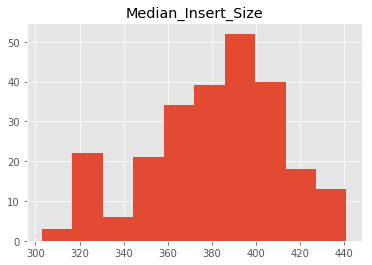

In [6]:
df[['Sample', 'Median_Insert_Size']].hist()

In [37]:
df['patient'] = df['Sample'].apply(lambda x: ''.join(['HTMCP-03-06-', x.split('-')[3]]).split('_')[0])

In [41]:
df = df[(df.Sample.str.contains('Malig'))]

In [42]:
df.set_index('patient').re_index()

,Sample,Read_Length,GC_NC_0_19,GC_NC_60_79,Base_Error,Median_Insert_Size,PCT_EXC_TOTAL,MAD_COVERAGE,PCT_25X,PCT_70X,...,PCT_100X,PCT_90X,PCT_80X,PCT_60X,PCT_15X,PCT_50X,PCT_EXC_BASEQ,PCT_40X,MEAN_COVERAGE,PCT_30X
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,HTMCP-03-06-02001_Malignant_A37234,125nt,0.697684,4.164070,0.0071,386,0.127498,14,0.971246,0.703390,...,0.183537,0.337600,0.532880,0.821584,0.977802,0.896032,0.043975,0.941111,81.379188,0.964926
HTMCP-03-06-02002,HTMCP-03-06-02002_Malignant_A37235,125nt,0.673862,4.520609,0.0072,383,0.139057,13,0.970494,0.623893,...,0.140315,0.241631,0.419786,0.784989,0.977603,0.885449,0.042983,0.938774,78.155551,0.963868
HTMCP-03-06-02003,HTMCP-03-06-02003_Malignant_A37236,125nt,0.706811,4.145859,0.0072,404,0.138384,15,0.967360,0.508004,...,0.104610,0.203535,0.344341,0.677387,0.977177,0.823438,0.039176,0.913790,71.003991,0.956875
HTMCP-03-06-02006,HTMCP-03-06-02006_Malignant_A37239,125nt,0.762003,3.338772,0.0065,392,0.123942,15,0.964481,0.464976,...,0.089470,0.169317,0.304188,0.626933,0.976156,0.789869,0.038554,0.903905,68.184670,0.952863
HTMCP-03-06-02007,HTMCP-03-06-02007_Malignant_A37240,125nt,0.684112,4.413409,0.0084,424,0.144814,14,0.972521,0.724780,...,0.182399,0.366230,0.563442,0.838102,0.978221,0.909178,0.053850,0.948584,80.162959,0.967482
HTMCP-03-06-02008,HTMCP-03-06-02008_Malignant_A37241,125nt,0.737114,3.793248,0.0070,412,0.128686,12,0.968794,0.545395,...,0.071162,0.149279,0.317667,0.735295,0.977138,0.855607,0.044124,0.925911,70.474050,0.960388
HTMCP-03-06-02012,HTMCP-03-06-02012_Malignant_A37243,125nt,0.630892,5.150142,0.0090,433,0.153562,17,0.970922,0.691368,...,0.229846,0.378995,0.544790,0.805581,0.977753,0.886768,0.059720,0.937788,82.828630,0.964224
HTMCP-03-06-02013,HTMCP-03-06-02013_Malignant_A37244,125nt,0.650663,4.834468,0.0079,432,0.143687,18,0.967581,0.616642,...,0.198061,0.309888,0.462181,0.745813,0.977129,0.847796,0.049066,0.918980,78.297779,0.957661
HTMCP-03-06-02020,HTMCP-03-06-02020_Malignant_A37247,125nt,0.678382,4.363709,0.0072,410,0.129720,15,0.969637,0.587406,...,0.134496,0.245027,0.402783,0.752971,0.977279,0.867258,0.043576,0.931646,75.052022,0.962075


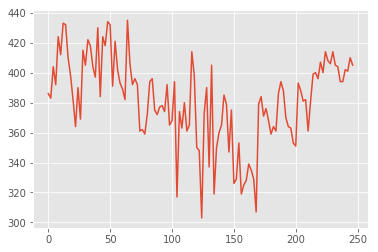

In [45]:
df.Median_Insert_Size.plot()

In [47]:
df.head()

,Sample,Read_Length,GC_NC_0_19,GC_NC_60_79,Base_Error,Median_Insert_Size,PCT_EXC_TOTAL,MAD_COVERAGE,PCT_25X,PCT_70X,...,PCT_90X,PCT_80X,PCT_60X,PCT_15X,PCT_50X,PCT_EXC_BASEQ,PCT_40X,MEAN_COVERAGE,PCT_30X,patient
0,HTMCP-03-06-02001_Malignant_A37234,125nt,0.697684,4.164070,0.0071,386,0.127498,14,0.971246,0.703390,...,0.337600,0.532880,0.821584,0.977802,0.896032,0.043975,0.941111,81.379188,0.964926,HTMCP-03-06-02001
2,HTMCP-03-06-02002_Malignant_A37235,125nt,0.673862,4.520609,0.0072,383,0.139057,13,0.970494,0.623893,...,0.241631,0.419786,0.784989,0.977603,0.885449,0.042983,0.938774,78.155551,0.963868,HTMCP-03-06-02002
4,HTMCP-03-06-02003_Malignant_A37236,125nt,0.706811,4.145859,0.0072,404,0.138384,15,0.967360,0.508004,...,0.203535,0.344341,0.677387,0.977177,0.823438,0.039176,0.913790,71.003991,0.956875,HTMCP-03-06-02003
6,HTMCP-03-06-02006_Malignant_A37239,125nt,0.762003,3.338772,0.0065,392,0.123942,15,0.964481,0.464976,...,0.169317,0.304188,0.626933,0.976156,0.789869,0.038554,0.903905,68.184670,0.952863,HTMCP-03-06-02006
8,HTMCP-03-06-02007_Malignant_A37240,125nt,0.684112,4.413409,0.0084,424,0.144814,14,0.972521,0.724780,...,0.366230,0.563442,0.838102,0.978221,0.909178,0.053850,0.948584,80.162959,0.967482,HTMCP-03-06-02007


In [46]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cervical_cnv/segments_counts.txt'
df_segments = pd.read_csv(f, sep='\t', header=None)
df_segments.columns = ['segs', 'patient']
df_segments.head()

,segs,patient
0,474,HTMCP-03-06-02001
1,320,HTMCP-03-06-02002
2,1118,HTMCP-03-06-02003
3,665,HTMCP-03-06-02006
4,266,HTMCP-03-06-02007


In [48]:
dfm = pd.merge(df_segments, df, left_on='patient', right_on='patient')

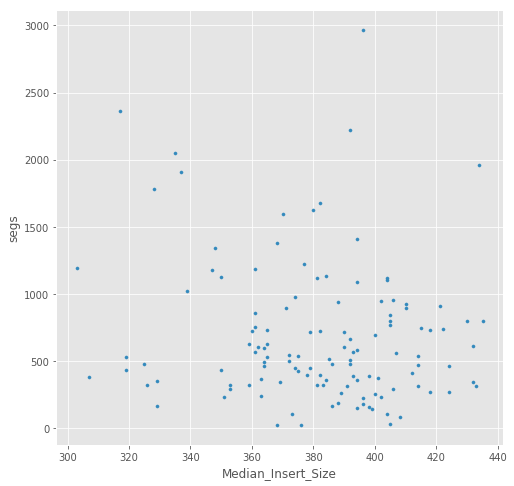

In [78]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,  frameon=True)
dfm[['patient', 'Median_Insert_Size', 'segs']].plot('Median_Insert_Size', 'segs', 
                                                    kind='scatter',marker='.', s=38, ax=ax)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/insert_size_and_number_segments.png'
plt.savefig(of, bbox_inches='tight')

In [35]:
sorted(df[(df.Sample.str.contains('Malig')) & (df.Median_Insert_Size.astype(int)<360)]['Sample'].apply(lambda x: ''.join(['HTMCP-03-06-', x.split('-')[3]]).split('_')[0]))

['HTMCP-03-06-02125',
 'HTMCP-03-06-02157',
 'HTMCP-03-06-02185',
 'HTMCP-03-06-02194',
 'HTMCP-03-06-02195',
 'HTMCP-03-06-02202',
 'HTMCP-03-06-02204',
 'HTMCP-03-06-02205',
 'HTMCP-03-06-02215',
 'HTMCP-03-06-02217',
 'HTMCP-03-06-02219',
 'HTMCP-03-06-02222',
 'HTMCP-03-06-02225',
 'HTMCP-03-06-02230',
 'HTMCP-03-06-02235',
 'HTMCP-03-06-02238',
 'HTMCP-03-06-02239',
 'HTMCP-03-06-02240',
 'HTMCP-03-06-02242',
 'HTMCP-03-06-02264',
 'HTMCP-03-06-02332',
 'HTMCP-03-06-02333']

# look for ways to clean up our cnvseq copy nunmber results

1. eliminate super small segments called for example 3kb or even 10kb
2. mask blacklisted non-diploid regions when segments length < threshold, for example 1Mb,this should take into consideration of segments flanking the segment, e.g. a:3copies, b: 4:copies, c: 3copies. although b is short but abc are all amplified, 4 copies may not accurate, but there is a gain for sure. in this case, b will be marked as 3.
3. also for those over-segmented cases, i may need to do something as well.??



In [11]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/Cervical_124_patients_adjusted/cnv_files_for_acen_removal.txt'
df1 = pd.read_csv(f1, sep='\t', header=None, comment='#')
df1.columns = ['patient', 'seg_path']
assert df1.shape[0] == 123
df1.head(2)

,patient,seg_path
0,HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
1,HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [12]:
# debug?
df1 = df1.query('patient == "{}"'.format('HTMCP-03-06-02335'))
df1

,patient,seg_path
100,HTMCP-03-06-02335,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [13]:
df2 = pd.DataFrame()
for idx, row in df1.iterrows():
    pat = row['patient']
    seg_file = row['seg_path']
#     print(pat, seg_file)
    # cnv_files, some rows have 10 columns instead of 9, problems from the APLcnv pipeline
    cnv = pd.read_csv(seg_file, sep='\t',  error_bad_lines=False, warn_bad_lines=True)
    cnv.columns = ['chr', 'start', 'end', 'cn']
    cnv = cnv[cnv.cn != 2]
    cnv['patient'] = pat
    if df2.empty:
        df2 = cnv
    else: df2 = pd.concat([df2,cnv])

In [14]:
df2.head(2)

,chr,start,end,cn,patient
0,1,121485063,142535434,1,HTMCP-03-06-02335
2,1,186369895,186586313,5,HTMCP-03-06-02335


In [15]:
df2.shape

(279, 5)

In [16]:
df2['seg_length'] = df2.end - df2.start

In [17]:
df2.head(2)

,chr,start,end,cn,patient,seg_length
0,1,121485063,142535434,1,HTMCP-03-06-02335,21050371
2,1,186369895,186586313,5,HTMCP-03-06-02335,216418


In [267]:
df2[df2.seg_length < 3000].shape

(2290, 6)

In [ ]:
# non-diploid segments per patient
segments = df2.groupby('patient').count().sort_values('cn', ascending=False)['cn']

In [270]:
segments.head(2)

patient
HTMCP-03-06-02109    2010
HTMCP-03-06-02157    1355
Name: cn, dtype: int64

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


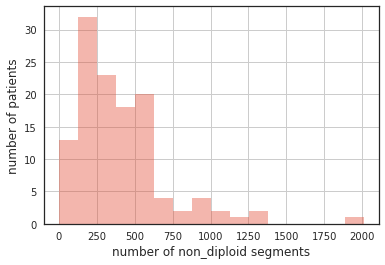

In [268]:
# distribution of number of segments
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.distplot(segments, kde=False)
    plt.xlabel('number of non_diploid segments')
    plt.ylabel('number of patients')

In [271]:
df2.groupby(['chr', 'start', 'end']).count().sort_values('patient', ascending=False).shape

(49733, 3)

In [272]:
df2.head()

,chr,start,end,cn,patient,seg_length
0,1,416575,564606,4,HTMCP-03-06-02001,148031
1,1,564607,569345,1,HTMCP-03-06-02001,4738
2,1,569346,722466,4,HTMCP-03-06-02001,153120
3,1,722467,831517,3,HTMCP-03-06-02001,109050
4,1,831518,1487296,4,HTMCP-03-06-02001,655778


In [51]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps.txt'
# of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels.txt'
# # df2[df2.cn >2].to_csv(of, index=False, header=None, sep='\t')
# df2[df2.cn <2].to_csv(of2, index=False, header=None, sep='\t')

In [18]:
patients = df2.patient.value_counts().index.tolist()

In [188]:
# plot chromosomes
f3 = '/home/szong/projects/resource/hg19_cytoband_ucsc.txt'
df3 = pd.read_csv(f3, header=None, sep='\t')
df3.columns = ['chr', 'start', 'end', 'cytoband', 'comments']
df3.head()

,chr,start,end,cytoband,comments
0,chr1,0,2300000,p36.33,gneg
1,chr1,2300000,5400000,p36.32,gpos25
2,chr1,5400000,7200000,p36.31,gneg
3,chr1,7200000,9200000,p36.23,gpos25
4,chr1,9200000,12700000,p36.22,gneg


In [11]:
# df3[df3.chr=='chr1']

look at GISTIC amp and del peak length distribution

In [189]:
# generate 3 million bins for the whole genome
f1 = '/home/szong/projects/resource/chrominfo.txt'
chrominfo = pd.read_csv(f1, sep='\t', index_col='#chrom')
chrominfo.columns = ['size', 'file_name']
chrominfo.head(2)

,size,file_name
#chrom,,
chr1,249250621,/gbdb/hg19/hg19.2bit
chr2,243199373,/gbdb/hg19/hg19.2bit


In [14]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/chr_bins.txt'
# with open(of,  'w') as fh:
#     writer = csv.writer(fh, delimiter='\t')
#     for i in np.arange(1, 23):
#         chr = 'chr{}'.format(i)

#         # ignoring the chromosome 1kb tail for now   
#         chr_size = chrominfo.loc[chr, 'size']
#         stride = 1000
#         bin1 = np.arange(1, chr_size, stride)
#         bin2 = np.arange(stride, chr_size+stride, stride)
#         bin_len = min(len(bin1), len(bin2))
#         bin1 = bin1[:bin_len]
#         bin2 = bin2[:bin_len]
#         bins = list(zip([i]*len(bin1), bin1, bin2))




#         for item in bins:
#             writer.writerow(item)
# need to use this line to remove special character
# cat chr_bins.txt|sed $'s/[^[:print:]\t]//g' >b.tmp 

find systematic cnv noise

In [191]:
# f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_bins_1kb.txt'
# df = pd.read_csv(f, sep='\t', header=None)
# df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']
# occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)
# recur_amps = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_bins_1kb_patients.txt'
recur_amps.to_csv(f, index=False, sep='\t')
recur_amps = pd.read_csv(f, sep='\t')

In [192]:
recur_amps.head(2)

,bin_chr,bin_start,bin_end,patient
0,1,10001,11000,1
1,1,11001,12000,1


In [ ]:
# recur_amps.patient.reset_index().drop('index', axis=1).plot()

figure out how many patients having deletions in each bin

/home/rcorbett/aligners/bedtools/BEDTools-Version-2.15.0/bin/bedtools intersect -a chr_bins.txt -b dels.txt.sorted -wa -wb > dels_bins_1kb.txt

In [193]:
# f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels_bins_1kb.txt'
# df = pd.read_csv(f, sep='\t', header=None)
# df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']
# occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)
# recur_dels = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels_bins_1kb_patients.txt'
recur_dels.to_csv(f, index=False, sep='\t')
recur_dels = pd.read_csv(f, sep='\t')

In [194]:
df2.head(2)

,chr,start,end,cn,patient
0,1,416575,564606,4,HTMCP-03-06-02001
1,1,564607,569345,1,HTMCP-03-06-02001


In [195]:
df3.head(2)

,chr,start,end,cytoband,comments
0,chr1,0,2300000,p36.33,gneg
1,chr1,2300000,5400000,p36.32,gpos25


In [197]:
# patients

In [ ]:
# plot cytoband hg19
df_segs = df2.copy()
df_cytoband = df3.copy()

In [255]:
patients = ['HTMCP-03-06-02071', 'HTMCP-03-06-02330', 'HTMCP-03-06-02441']

processing chr 1 and the chr_offset is 0
plotting amp aggregation


/home/szong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


plotting del aggregation


/home/szong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


processing chr 2 and the chr_offset is 249250621
plotting amp aggregation
plotting del aggregation
processing chr 3 and the chr_offset is 492449994
plotting amp aggregation
plotting del aggregation
processing chr 4 and the chr_offset is 690472424
plotting amp aggregation
plotting del aggregation
processing chr 5 and the chr_offset is 881626700
plotting amp aggregation
plotting del aggregation
processing chr 6 and the chr_offset is 1062541960
plotting amp aggregation
plotting del aggregation
processing chr 7 and the chr_offset is 1233657027
plotting amp aggregation
plotting del aggregation
processing chr 8 and the chr_offset is 1392795690
plotting amp aggregation
plotting del aggregation
processing chr 9 and the chr_offset is 1539159712
plotting amp aggregation
plotting del aggregation
processing chr 10 and the chr_offset is 1680373143
plotting amp aggregation
plotting del aggregation
processing chr 11 and the chr_offset is 1815907890
plotting amp aggregation
plotting del aggregation
pr

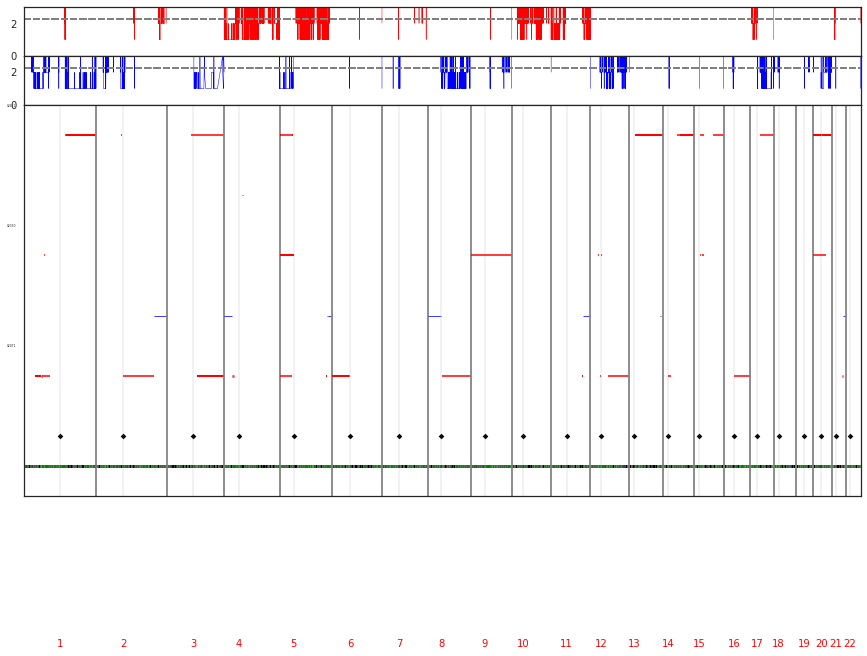

In [258]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
#     fig = plt.figure(facecolor='w', figsize=(15,9))
    fig = plt.figure(figsize=(15, 9), facecolor='white')
    gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,8],
                           wspace=0.05, # horizontal space
                           hspace=0.0  # vertical space
                          )
    
    ax0 = fig.add_subplot(gs[0], facecolor='white')
    ax1 = fig.add_subplot(gs[1], facecolor='white')
    ax2 = fig.add_subplot(gs[2], facecolor='white')
    chr_offset = 0 # chromosome offset
    num_patients = len(patients)
#     ylim = 4
    ylim = num_patients/10.0+0.1
    for chr in np.arange(1,23):
        print('processing chr {0} and the chr_offset is {1}'.format(chr, chr_offset))
        dfchr = df_cytoband[df_cytoband.chr=='chr{}'.format(chr)]
        clrs = ['-k', '-g']*100
        
        num_segs = dfchr.shape[0]
        # plot centromere
        acen = dfchr[dfchr.comments=='acen'].reset_index().loc[0, 'end'] + chr_offset
        ax2.plot(acen, 0.1, color='black',marker='D', markersize=4)
        ax2.axvline(x=acen, color='gray', linewidth=0.2)
        ax2.text(acen, -.25, '{}'.format(chr), color='red', horizontalalignment='center')
        
        clrs = clrs[:num_segs]
        i = 0 # color index
        for idx, row in dfchr.iterrows():
            start = row.start + chr_offset
            end = row.end + chr_offset
            cytoband = row.cytoband
            comment = row.comments
            center = (start + end)/2 + chr_offset
            width = int(end - start)
            ax2.plot((start, end), (0.05,0.05), clrs[i], linewidth=3, solid_capstyle='butt')        
            i+=1

        
        # draw chromosome boundary
        ax2.axvline(x=chr_offset, color='gray')
        
        
        # plot amp aggregate results
        amps = recur_amps.query('bin_chr == {0}'.format(chr))
        print('plotting amp aggregation')
        amps['x'] = amps.bin_start + chr_offset
        ax0.plot(amps.x, amps.patient, color='red', linewidth=.5, solid_capstyle='butt')
        ax0.axhline(y=0.75*num_patients, color='gray', linestyle='dashed')

        # plot del aggregate results
        dels = recur_dels.query('bin_chr == {0}'.format(chr))
        print('plotting del aggregation')
        dels['x'] = dels.bin_start + chr_offset
        ax1.plot(dels.x, dels.patient, color='blue', linewidth=.5, solid_capstyle='butt')
        ax1.axhline(y=0.75*num_patients, color='gray', linestyle='dashed')
 
       
        # plot cnvs
        j = 0 # row offset
        yticks = []
        cnvy_coords = []
        for patient in patients: 
#             print('plotting patient {0}, cnvy_coords is {1}'.format(patient, 0.2+j))
            # plot amplification
            amps = df_segs.query('chr == {0} & patient == "{1}" & cn > 2'.format(chr, patient))
            m=0 #test label offset to be deleted
            for idx, row in amps.iterrows():
                start = row.start + chr_offset
                end = row.end + chr_offset
                length = end - start
                cn = row.cn
#                 if chr == 7 or chr ==14:
#                     print('plotting amps line {0}:{1}-{2}, cn {3}, length {4}'.format(chr, row.start, row.end, cn, row.end-row.start))
                    

#                 it looks like can not see anything <150000 on a 3 billion scale, so magnfiy anything to 150000
                if length < 200000:
                    end = start + 200000
                ax2.plot((start, end), (0.2+j, 0.2+j), color='red', marker='_', linewidth=cn*0.5, solid_capstyle='butt')
#                 ax2.text(start, 0.2+m, str(row.start))
#                 m+=0.2
            # plot deletion
            dels = df_segs.query('chr == {0} & patient == "{1}" & cn < 2'.format(chr, patient))
            for idx, row in dels.iterrows():
                start = row.start + chr_offset
                end = row.end + chr_offset
                length = end - start
                cn = row.cn
                if length < 200000:
                    end = start + 200000
                del_w = 2 - cn
                ax2.plot((start, end), (0.3+j, 0.3+j), color='blue', marker='_', linewidth=del_w*0.75, solid_capstyle='butt')
            yticks.append(0.25+j)
            j+=0.2
        chr_offset+=max(dfchr.end)
    ax0.set_xlim(0, chr_offset)
    ax0.set_ylim(0, num_patients)
    ax1.set_xlim(0, chr_offset)
    ax1.set_ylim(0, num_patients)
    ax2.set_xlim(0, chr_offset)
    ax2.set_ylim(0, ylim)
    ax0.set_xticklabels('')
    ax1.set_xticklabels('')
    ax2.set_xticklabels('')
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([i.split('-')[3] for i in patients], fontsize=3)
#     plt.tight_layout()
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cnv_123_patients.png'
    plt.savefig(of, dpi=800)
    plt.show()

In [ ]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_bins_1kb.txt'
df = pd.read_csv(f, sep='\t', header=None)
df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']
df.head(2)

occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)

occurrence.head()

type(occurrence.reset_index())

recur_amps = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])

recur_amps.head()

f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_bins_1kb_patients.txt'
recur_amps.to_csv(f, index=False, sep='\t')

sanity check: because of resolution, bands less than 100kb in length may not show on the plot.

    while read a b;do echo -ne $a"\t";/home/rcorbett/aligners/bedtools/BEDTools-Version-2.15.0/bin/bedtools intersect -a $b -b a.tmp ;done < Cervical_124_patients_adjusted/cnv_files_for_acen_removal.txt |awk '$5>2'

 these are 3 examples of peaks in 7q14.1, we should see them in the plot
 while read a b;do echo -ne $a"\t";/home/rcorbett/aligners/bedtools/BEDTools-Version-2.15.0/bin/bedtools intersect -a $b -b 7q14.1_peak_coords.txt -wa -wb;done < cnv_files_for_acen_removal.txt|grep "02441\|02330\|02071"
 
HTMCP-03-06-02071	7	38294085	38374669	4	7	38311127	38338695

HTMCP-03-06-02330	7	38309671	38338696	4	7	38311127	38338695

HTMCP-03-06-02441	7	38292804	38368824	4	7	38311127	38338695


# clean up by masking GISTIC wide peaks after review and black listed regions

In [61]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/Cervical_124_patients_adjusted/cnv_files_for_acen_removal.txt'
df1 = pd.read_csv(f1, sep='\t', header=None, comment='#')
df1.columns = ['patient', 'seg_path']
assert df1.shape[0] == 123
df1.head(2)

,patient,seg_path
0,HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
1,HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [62]:
# peak region to remove: my scipts identified
# 6	58776001	58780001	4000
# 7	38294001	38371001	77000
# 14	22406001	22971001	565000

# GISTIC wide peaks
# chr14:22779419-22934657	
# chr7:38311127-38338695	
# chr7:142421419-142476036
# chr4:68264255-68264791



In [63]:
# f3 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/peaks_to_remove.txt'
# df3 = pd.read_csv(f3, comment="#", sep='\t', header=None)
# df3.columns= ['chr', 'start', 'end', 'length']
# df3

In [19]:
f3_1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/pog_cnv/amps_noise_to_review.txt'
amp_noise = pd.read_csv(f3_1, sep='\t', comment='#', header=None)
amp_noise.columns = ['chr', 'start', 'end', 'length', 'cytoband']
amp_noise.head(2)

,chr,start,end,length,cytoband
0,1,143118001,143293001,175000,1q21.1
1,1,143645001,144221001,576000,1q21.1


In [20]:
amp_noise.sort_values('length', ascending=False).head()

,chr,start,end,length,cytoband
17,7,57992836,67004513,900000,xx
1,1,143645001,144221001,576000,1q21.1
10,14,22465001,22969001,504000,14q11.2
16,5,37209390,37449833,240000,xx
0,1,143118001,143293001,175000,1q21.1


In [21]:
# masked amp region length
amp_noise.length.sum()

3030000

In [22]:
f3_2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/pog_cnv/dels_noise_to_review.txt'
del_noise = pd.read_csv(f3_2, sep='\t', comment='#', header=None)
del_noise.columns = ['chr', 'start', 'end', 'length', 'cytoband']
del_noise.head(2)

,chr,start,end,length,cytoband
0,1,143349001,143545001,196000,1q21.1
1,2,92290001,92293001,3000,2p11.1


del_noise.sort_values(['chr', 'start', 'end','length'], ascending=False)

In [23]:
# masked del region length
del_noise.length.sum()

1197000

In [66]:
# rules to clean up for both amps and dels
# overlap 10% of the interval to be masked
# if cn>2 and if neighbouring segments amplified as well, len(segment_minus1, segment, segment_plus1) > 1mb,change to neighbouring cn, otherwise change the cn to 2
# if cn <2 and if neighbouring segments deleted as well, len(segment_minus1, segment, segment_plus1) > 1mb, change to neighboruing cn, change to 2

In [67]:
df1.head(2)

,patient,seg_path
0,HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
1,HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [24]:
def overlap_intervals(a, b):
    overlap = max(0, min(a[1], b[1]) - max(a[0], b[0]))
    return overlap


In [25]:
# shortest chromosome 21 = ~48Mb
normal_cn = 2 # assuming diploid
len_threshold = 3000 # reliable focal cnv length called by cnvseq
combined_length = 1e6 # length of amplified or deleted combining neighouring amps or dels
overlap_threshold = 0.1 # >10% overlap with noise region to be considered masking

In [70]:
# shortest chromosome 21 = ~48Mb
# normal_cn = 2 # assuming diploid
# len_threshold = 10000 # reliable focal cnv length called by cnvseq
# combined_length = 2e6 # length of amplified or deleted combining neighouring amps or dels
# overlap_threshold = 0.05 # >10% overlap with noise region to be considered masking

In [26]:
def find_neighbour_segs(seg_arr, seg_idx):
    if seg_idx == 0:
        arr = seg_arr[ :seg_idx+2, ]
    elif seg_idx == len(seg_arr)-1: 
        arr = seg_arr[seg_idx-1: , ]
    else:
        arr = seg_arr[seg_idx-1 : seg_idx+2, ]
    
    # only merge the same chromosome
    chr = seg_arr[seg_idx, 0]
    ix, = np.where(arr[:, 0] == chr)
    arr = arr[ix,]
    return arr

In [27]:
def adj_length_cn(seg_arr, seg_idx, cn):   
    arr = find_neighbour_segs(seg_arr, seg_idx)
    if cn > normal_cn: 
        idx,  = np.where(arr[:, 3] > normal_cn)
        adj_cn = min(arr[idx, 3])
    elif cn < normal_cn:
        idx, = np.where(arr[:, 3] < normal_cn)
        adj_cn = max(arr[idx, 3])
    seg_len = sum(arr[idx, 4])
    return (seg_len, adj_cn)

In [28]:
def assign_cn_on_length(seg_len, adj_cn):
    if seg_len > combined_length:
#         print('change cn to {}'.format(adj_cn))
        cn = adj_cn
    else: 
#         print('change cn to {}'.format(normal_cn))
        cn = normal_cn
    return cn

In [29]:
def mask_cn(chrm, start, end, length, seg, segs, i, cn, noise):
    for j, m_row in noise.iterrows():
        m_chrm, m_start, m_end, m_len_tmp, m_cytoband = m_row
        m_length = m_end - m_start
        if chrm == m_chrm:
            overlap = overlap_intervals([start, end], [m_start, m_end])
            if overlap/min(length, m_length)*1.0 > overlap_threshold:
                seg_len, adj_cn = adj_length_cn(segs, i, cn)
                cn = assign_cn_on_length(seg_len, adj_cn)
                print('region {0} overlap {1}, change cn to {2}'.format(seg, overlap, cn))
                break # a seg may overlap multiple noise regions
    return cn

In [30]:
def mask_false_cnv(df_segs, amp_noise, del_noise, of):    
    with open(of, 'w') as writer:
        segs = df_segs.values
        num_segs = len(segs)
        num_amps_adj = 0
        num_dels_adj = 0
        num_small = 0
        for i, seg in enumerate(segs):
            chrm, start, end, cn, seg_len_tmp = seg
            length = end - start
            amp_chrms = amp_noise.chr.unique()
            del_chrms = del_noise.chr.unique()
            if length < len_threshold and cn != normal_cn:                
                seg_len, adj_cn = adj_length_cn(segs, i, cn)
                cn = assign_cn_on_length(seg_len, adj_cn)
                num_small+=1
                print('{0}<3kb, merge to neighbouring segment, change cn to {1}'.format(seg, cn))
            elif chrm in amp_chrms and cn > normal_cn: # m_: to mask
                cn = mask_cn(chrm, start, end, length, seg, segs, i, cn, amp_noise)
                num_amps_adj+=1
            elif chrm in del_chrms and cn < normal_cn:
                cn = mask_cn(chrm, start, end, length, seg, segs, i, cn, del_noise)
                num_dels_adj+=1
            else: 
#                 print('not <3kb, not blacklisted, or not amplified/deleted!')
                pass
          
            writer.write('\t'.join([str(i) for i in [chrm, start, end, cn]]))
            writer.write('\n')
        small_pct = num_small/num_segs
        amp_pct = num_amps_adj/num_segs
        del_pct = num_dels_adj/num_segs
        print('{0} small segs adjusted; {1} amp segs adjusted; {2} del segs adjusted.'.format(small_pct, amp_pct, del_pct))

In [76]:

# def mask_false_cnv_bk(df_segs, amp_noise, del_noise, of):    
#     with open(of, 'w') as writer:
#         segs = df_segs.values
#         num_segs = len(segs)
#         for i, seg in enumerate(segs):
# #             print(i, seg)
#             chrm, start, end, cn, seg_len_tmp = seg
#             length = end - start
#             amp_chrms = amp_noise.chr.unique()
#             del_chrms = del_noise.chr.unique()
#             if length < len_threshold and cn != normal_cn:                
#                 seg_len, adj_cn = adj_length_cn(segs, i, cn)
#                 cn = assign_cn_on_length(seg_len, adj_cn)
#                 print('{0}<3kb, merge to neighbouring segment, change cn to {1}'.format(seg, cn))
#             elif chrm in amp_chrms and cn > normal_cn: # m_: to mask
#                 cn = mask_cn(chrm, start, end, length, seg, segs, i, cn, amp_noise)
# #                 print('ampaaaaaaaa')
# #                 for j, m_row in amp_noise.iterrows():
# #                     m_chrm, m_start, m_end, m_len_tmp, m_cytoband = m_row
# #                     m_length = m_end - m_start
# #                     if chrm == m_chrm:
# #                         overlap = overlap_intervals([start, end], [m_start, m_end])
# #                         if overlap/min(length, m_length)*1.0 > overlap_threshold:
# #                             seg_len, adj_cn = adj_length_cn(segs, i, cn)
# #                             cn = assign_cn_on_length(seg_len, adj_cn)
# #                             print('region {0} overlap {1}, change cn to {2}'.format(seg, overlap, cn))
# #                             break # a seg may overlap multiple noise regions
#             elif chrm in del_chrms and cn < normal_cn:
#                 cn = mask_cn(chrm, start, end, length, seg, segs, i, cn, del_noise)
# #                 print('dellllllllllll')
# #                 for j, m_row in del_noise.iterrows():
# #                     m_chrm, m_start, m_end, m_len_tmp, m_cytoband = m_row
# #                     m_length = m_end - m_start
# #                     if chrm == m_chrm:
# #                         overlap = overlap_intervals([start, end], [m_start, m_end])
# #                         if overlap/min(length, m_length)*1.0 > overlap_threshold:                            
# #                             seg_len, adj_cn = adj_length_cn(segs, i, cn)
# #                             cn = assign_cn_on_length(seg_len, adj_cn) 
# #                             print('region {0} overlap {1}, change cn to {2}'.format(seg, overlap, cn))
# #                             break # a seg may overlap multiple noise regions
#             else: 
# #                 print('not <3kb, not blacklisted, or not amplified/deleted!')
#                 pass
#             writer.write('\t'.join([str(i) for i in [chrm, start, end, cn]]))
#             writer.write('\n')

In [31]:
for idx, row in df1.iterrows():   
    
    patient = row.patient
    print('masking potential false cnvs for {}'.format(patient))
    seg_file = row.seg_path
    dftmp = pd.read_csv(seg_file, sep='\t', header=None)
    dftmp.columns = ['chr', 'start', 'end', 'cn']
    dftmp['length'] = dftmp.end - dftmp.start
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/Cervical_124_patients_adjusted/w200_clean/{}/w200_segs_cleaned.txt.test'.format(patient)
    mask_false_cnv(dftmp, amp_noise, del_noise, of)
#     break

masking potential false cnvs for HTMCP-03-06-02335
region [        3 196144398 197903178         3   1758780] overlap 35201, change cn to 3
region [      4   10037 8952299       1 8942262] overlap 58964, change cn to 1
region [       5 36186918 37643049        5  1456131] overlap 240443, change cn to 4
[       6 58777165 58777714        3      549]<3kb, merge to neighbouring segment, change cn to 2
[       6 58778379 58778823        3      444]<3kb, merge to neighbouring segment, change cn to 2
region [       7 38294080 38312201        4    18121] overlap 18121, change cn to 2
region [       7 38312202 38340707        5    28505] overlap 28505, change cn to 2
region [       7 38340708 38368445        4    27737] overlap 27737, change cn to 2
region [       7 38368446 38402484        3    34038] overlap 26555, change cn to 2
[       7 61968931 61969506        4      575]<3kb, merge to neighbouring segment, change cn to 2
region [       7 61976363 62027714        3    51351] overlap 5135